In [2]:
# Embedding Visualization with Ollama Integration
import sys
import json
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Addeding folder path to sys.path
sys.path.append('/Users/jeetundaviya/Documents/rag_chatbot')

from src.embeddings.ollama_embedding import get_ollama_embeddings

In [3]:
# Load chunked data
with open("data/processed/chunks.json", "r") as f:
    chunks = json.load(f)

In [6]:
# Initialize Ollama Embeddings
embedding_model = get_ollama_embeddings(model="all-minilm")

In [7]:
# Generate embeddings for each chunk
print("Generating embeddings...")
embeddings = embedding_model.embed_documents(chunks)

Generating embeddings...


In [8]:
print(f"Generated {len(embeddings)} embeddings with dimension {len(embeddings[0])}")


Generated 461 embeddings with dimension 384


In [10]:
# Convert embeddings to a numpy array
embeddings_array = np.array(embeddings)

In [11]:
# Dimensionality Reduction
print("Performing PCA for dimensionality reduction...")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embeddings_array)

Performing PCA for dimensionality reduction...


In [12]:
print("Performing t-SNE for dimensionality reduction...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(embeddings_array)

Performing t-SNE for dimensionality reduction...


/Users/jeetundaviya/Documents/rag_chatbot/env/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [13]:
# Visualization
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

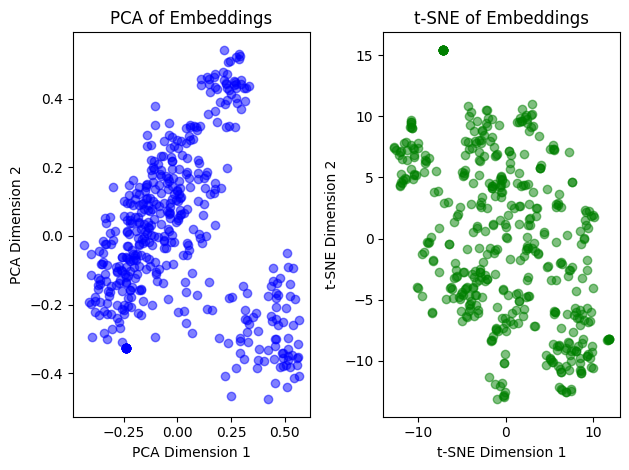

In [14]:
# PCA Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', alpha=0.5)
plt.title("PCA of Embeddings")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")

# t-SNE Scatter Plot
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='green', alpha=0.5)
plt.title("t-SNE of Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

plt.tight_layout()
plt.show()